In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
path = 'resources/food-inspections.csv'
df = pd.read_csv(path, sep=',')
df.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2316058,CHICAGO TAICHI BUBBLE TEA,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,...,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,42.005587,-87.661077,"{'longitude': '42.00558686485114', 'latitude':...",NaN,NaN,NaN,NaN,NaN
1,2316065,Krispy Kreme Doughnuts,Krispy Kreme Doughnuts,2689327.0,Restaurant,Risk 2 (Medium),108 N STATE ST,CHICAGO,IL,60602.0,...,Pass,NaN,41.883423,-87.628022,"{'longitude': '41.88342263701488', 'latitude':...",NaN,NaN,NaN,NaN,NaN


In [234]:
nb_NaN_violations = len(df) - df['Violations'].count()
print("We have {} out of {} inspections with no violations recorded. It makes {}%.".format(nb_NaN_violations, len(df), "%.2f" % (nb_NaN_violations/len(df)*100)))

We have 51597 out of 194615 inspections with no violations recorded. It makes 26.51%.


In [235]:
df_split = df.copy()
df_split['Violations'] = df_split['Violations'].map(lambda x: str(x).split('|'))
df_split.head(3)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2316058,CHICAGO TAICHI BUBBLE TEA,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,...,Pass,[47. FOOD & NON-FOOD CONTACT SURFACES CLEANABL...,42.005587,-87.661077,"{'longitude': '42.00558686485114', 'latitude':...",NaN,NaN,NaN,NaN,NaN
1,2316065,Krispy Kreme Doughnuts,Krispy Kreme Doughnuts,2689327.0,Restaurant,Risk 2 (Medium),108 N STATE ST,CHICAGO,IL,60602.0,...,Pass,[nan],41.883423,-87.628022,"{'longitude': '41.88342263701488', 'latitude':...",NaN,NaN,NaN,NaN,NaN
2,2316054,SUBWAY,SUBWAY,2590201.0,Restaurant,Risk 1 (High),2512 W NORTH AVE,CHICAGO,IL,60647.0,...,Pass,[39. CONTAMINATION PREVENTED DURING FOOD PREPA...,41.910399,-87.690207,"{'longitude': '41.910398978211525', 'latitude'...",NaN,NaN,NaN,NaN,NaN


In [236]:
violations = df_split.explode('Violations').rename(columns={'Violations' : 'Violation'})
violations = violations[violations['Violation'] != 'nan']
nb_violations = len(violations)
violations.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violation,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2316058,CHICAGO TAICHI BUBBLE TEA,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,...,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,42.005587,-87.661077,"{'longitude': '42.00558686485114', 'latitude':...",NaN,NaN,NaN,NaN,NaN
0,2316058,CHICAGO TAICHI BUBBLE TEA,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,...,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED...",42.005587,-87.661077,"{'longitude': '42.00558686485114', 'latitude':...",NaN,NaN,NaN,NaN,NaN
2,2316054,SUBWAY,SUBWAY,2590201.0,Restaurant,Risk 1 (High),2512 W NORTH AVE,CHICAGO,IL,60647.0,...,Pass,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,41.910399,-87.690207,"{'longitude': '41.910398978211525', 'latitude'...",NaN,NaN,NaN,NaN,NaN
2,2316054,SUBWAY,SUBWAY,2590201.0,Restaurant,Risk 1 (High),2512 W NORTH AVE,CHICAGO,IL,60647.0,...,Pass,40. PERSONAL CLEANLINESS - Comments: Inspecto...,41.910399,-87.690207,"{'longitude': '41.910398978211525', 'latitude'...",NaN,NaN,NaN,NaN,NaN
3,2316057,LITTLE GENIUS COMMUNITY DAYCARE 11,LITTLE GENIUS COMMUNITY DAYCARE,2359451.0,Daycare (2 - 6 Years),Risk 1 (High),1000 W 103RD ST,CHICAGO,IL,60643.0,...,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.706982,-87.647758,"{'longitude': '41.706982259265786', 'latitude'...",NaN,NaN,NaN,NaN,NaN


In [237]:
def get_violation_id(x):
    return x.split('.')[0].strip()

violations['Violation ID'] = violations['Violation'].apply(get_violation_id).astype(int)
violations.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Violation,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Violation ID
0,2316058,CHICAGO TAICHI BUBBLE TEA,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,...,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,42.005587,-87.661077,"{'longitude': '42.00558686485114', 'latitude':...",NaN,NaN,NaN,NaN,NaN,47
0,2316058,CHICAGO TAICHI BUBBLE TEA,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,...,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED...",42.005587,-87.661077,"{'longitude': '42.00558686485114', 'latitude':...",NaN,NaN,NaN,NaN,NaN,55
2,2316054,SUBWAY,SUBWAY,2590201.0,Restaurant,Risk 1 (High),2512 W NORTH AVE,CHICAGO,IL,60647.0,...,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,41.910399,-87.690207,"{'longitude': '41.910398978211525', 'latitude'...",NaN,NaN,NaN,NaN,NaN,39
2,2316054,SUBWAY,SUBWAY,2590201.0,Restaurant,Risk 1 (High),2512 W NORTH AVE,CHICAGO,IL,60647.0,...,40. PERSONAL CLEANLINESS - Comments: Inspecto...,41.910399,-87.690207,"{'longitude': '41.910398978211525', 'latitude'...",NaN,NaN,NaN,NaN,NaN,40
3,2316057,LITTLE GENIUS COMMUNITY DAYCARE 11,LITTLE GENIUS COMMUNITY DAYCARE,2359451.0,Daycare (2 - 6 Years),Risk 1 (High),1000 W 103RD ST,CHICAGO,IL,60643.0,...,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.706982,-87.647758,"{'longitude': '41.706982259265786', 'latitude'...",NaN,NaN,NaN,NaN,NaN,55


In [264]:
def is_violation_high_severity(x):
    return x <= 14

def is_violation_medium_severity(x):
    return 15 <= x and x <= 29

def is_violation_low_severity(x):
    return 30 <= x

def get_violation_severity(x):
    if is_violation_high_severity(x):
        return 'Severity 1 (High)'
    if is_violation_medium_severity(x):
        return 'Severity 2 (Medium)'
    return 'Severity 3 (Low)'

violations['Violation Severity'] = violations['Violation ID'].apply(get_violation_severity)
violations.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Violation ID,Violation Severity
0,2316058,CHICAGO TAICHI BUBBLE TEA,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,...,42.005587,-87.661077,"{'longitude': '42.00558686485114', 'latitude':...",NaN,NaN,NaN,NaN,NaN,47,Severity 3 (Low)
0,2316058,CHICAGO TAICHI BUBBLE TEA,CHICAGO TAICHI BUBBLE TEA,2694548.0,Restaurant,Risk 1 (High),6800 N SHERIDAN RD,CHICAGO,IL,60626.0,...,42.005587,-87.661077,"{'longitude': '42.00558686485114', 'latitude':...",NaN,NaN,NaN,NaN,NaN,55,Severity 3 (Low)
2,2316054,SUBWAY,SUBWAY,2590201.0,Restaurant,Risk 1 (High),2512 W NORTH AVE,CHICAGO,IL,60647.0,...,41.910399,-87.690207,"{'longitude': '41.910398978211525', 'latitude'...",NaN,NaN,NaN,NaN,NaN,39,Severity 3 (Low)
2,2316054,SUBWAY,SUBWAY,2590201.0,Restaurant,Risk 1 (High),2512 W NORTH AVE,CHICAGO,IL,60647.0,...,41.910399,-87.690207,"{'longitude': '41.910398978211525', 'latitude'...",NaN,NaN,NaN,NaN,NaN,40,Severity 3 (Low)
3,2316057,LITTLE GENIUS COMMUNITY DAYCARE 11,LITTLE GENIUS COMMUNITY DAYCARE,2359451.0,Daycare (2 - 6 Years),Risk 1 (High),1000 W 103RD ST,CHICAGO,IL,60643.0,...,41.706982,-87.647758,"{'longitude': '41.706982259265786', 'latitude'...",NaN,NaN,NaN,NaN,NaN,55,Severity 3 (Low)


In [239]:
all_violations_ids = violations['Violation ID'].unique()
all_violations_ids.sort()
all_violations_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 70])

In [240]:
violations_id_count = violations[['Inspection ID', 'Violation ID']].groupby('Violation ID').count().rename(columns={'Inspection ID' : 'Count'})
violations_id_count.sort_values('Count', ascending=False).head(10)

,Count
Violation ID,
34,71813
35,64910
33,63715
38,57539
32,54982
41,34873
36,27991
3,18836
18,16992


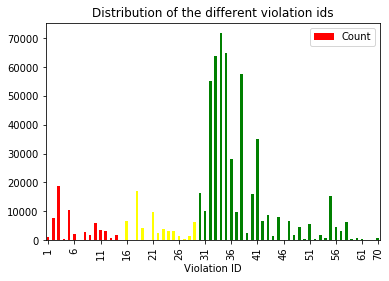

In [241]:
colors = [['red']*14 + ['yellow']*15 + ['green']*(len(violations_count) - 14 - 15)]
violations_id_count.plot.bar(color=colors)
plt.title("Distribution of the different violation ids")
xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 5 != 0:
        xticks[i].set_visible(False)
xticks[-1].set_visible(True)

In [242]:
violations_severity_count = violations[['Inspection ID', 'Violation Severity']].groupby('Violation Severity').count().rename(columns={'Inspection ID' : 'Count'})
violations_severity_count['Percent'] = violations_severity_count['Count'].apply(lambda x: "%.3f" % (x/nb_violations*100))
violations_severity_count

,Count,Percent
Violation Severity,,
Severity 1 (High),60483,9.630
Severity 2 (Medium),60071,9.564
Severity 3 (Low),507517,80.806


Text(0.5, 1.0, 'Distribution of the severity levels for the violations')

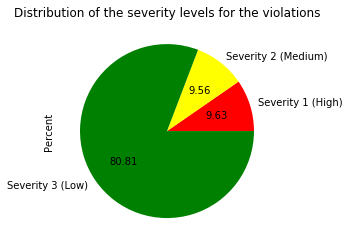

In [243]:
violations_severity_count['Percent'].astype(float).plot.pie(autopct='%.2f', colors=['red', 'yellow', 'green'], fontsize=10)
ax.legend(labels=violations_severity_count.index)
plt.title("Distribution of the severity levels for the violations")

In [249]:
df_violation_ids = df_split.copy()
df_violation_ids['Violation IDs'] = df_violation_ids['Violations'].apply(lambda violations: [get_violation_id(x) for x in violations])
df_violation_ids['Nb Violations'] = df_violation_ids['Violation IDs'].apply(lambda x: 0 if 'nan' in x else len(x))
df_violation_ids[['Violations', 'Violation IDs', 'Nb Violations']].head()

,Violations,Violation IDs,Nb Violations
0,[47. FOOD & NON-FOOD CONTACT SURFACES CLEANABL...,"[47, 55]",2
1,[nan],[nan],0
2,[39. CONTAMINATION PREVENTED DURING FOOD PREPA...,"[39, 40]",2
3,"[55. PHYSICAL FACILITIES INSTALLED, MAINTAINED...",[55],1
4,[23. PROPER DATE MARKING AND DISPOSITION - Com...,"[23, 37, 38, 41, 49, 55, 55, 55, 55]",9


Text(0.5, 1.0, 'Distribution of the number of violations by inspection')

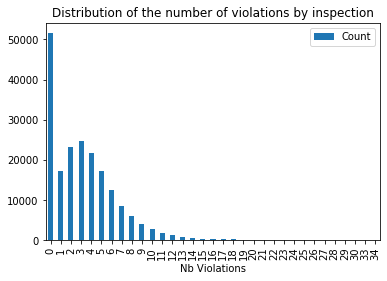

In [259]:
df_violation_ids[['Inspection ID', 'Nb Violations']].groupby('Nb Violations').count().rename(columns={'Inspection ID' : 'Count'}).plot.bar()
plt.title("Distribution of the number of violations by inspection")

In [274]:
df_violation_ids['Nb Violations of severity 1 (high)'] = df_violation_ids['Violation IDs'].apply(lambda violation_ids: len([x for x in violation_ids if x != 'nan' and is_violation_high_severity(int(x))]))
df_violation_ids['Nb Violations of severity 2 (medium)'] = df_violation_ids['Violation IDs'].apply(lambda violation_ids: len([x for x in violation_ids if x != 'nan' and is_violation_medium_severity(int(x))]))
df_violation_ids['Nb Violations of severity 3 (low)'] = df_violation_ids['Violation IDs'].apply(lambda violation_ids: len([x for x in violation_ids if x != 'nan' and is_violation_low_severity(int(x))]))
df_violation_ids[['Nb Violations', 'Nb Violations of severity 1 (high)', 'Nb Violations of severity 2 (medium)', 'Nb Violations of severity 3 (low)']].head()

,Nb Violations,Nb Violations of severity 1 (high),Nb Violations of severity 2 (medium),Nb Violations of severity 3 (low)
0,2,0,0,2
1,0,0,0,0
2,2,0,0,2
3,1,0,0,1
4,9,0,1,8


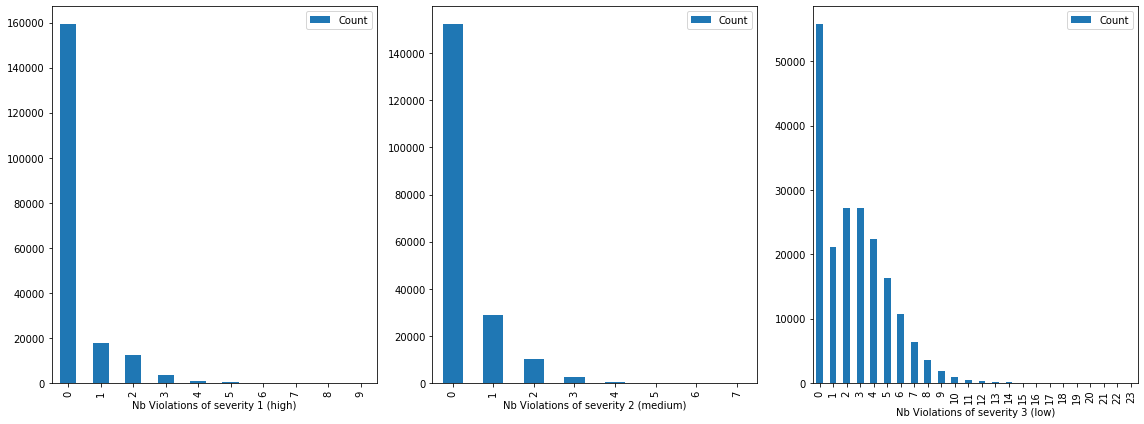

In [304]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
df_violation_ids[['Inspection ID', 'Nb Violations of severity 1 (high)']].groupby('Nb Violations of severity 1 (high)').count().rename(columns={'Inspection ID' : 'Count'}).plot.bar(ax=ax1)
df_violation_ids[['Inspection ID', 'Nb Violations of severity 2 (medium)']].groupby('Nb Violations of severity 2 (medium)').count().rename(columns={'Inspection ID' : 'Count'}).plot.bar(ax=ax2)
df_violation_ids[['Inspection ID', 'Nb Violations of severity 3 (low)']].groupby('Nb Violations of severity 3 (low)').count().rename(columns={'Inspection ID' : 'Count'}).plot.bar(ax=ax3)
plt.tight_layout()